## Task 1: Univariate Outlier detection 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.preprocessing import StandardScaler

In [39]:
# Load data
df = pd.read_csv("prog_book.csv")
print(df)

     Rating Reviews                                         Book_title  \
0      4.17   3,829                              The Elements of Style   
1      4.01   1,406      The Information: A History, a Theory, a Flood   
2      3.33       0       Responsive Web Design Overview For Beginners   
3      3.97   1,658  Ghost in the Wires: My Adventures as the World...   
4      4.06   1,325                                   How Google Works   
..      ...     ...                                                ...   
266    3.76       0  3D Game Engine Architecture: Engineering Real-...   
267    3.94      22                An Introduction to Database Systems   
268    4.49      36  The Art of Computer Programming, Volumes 1-3 B...   
269    4.77       4  The Art of Computer Programming, Volumes 1-4a ...   
270    3.84       5              A Discipline for Software Engineering   

                                           Description  Number_Of_Pages  \
0    This style manual offers practi

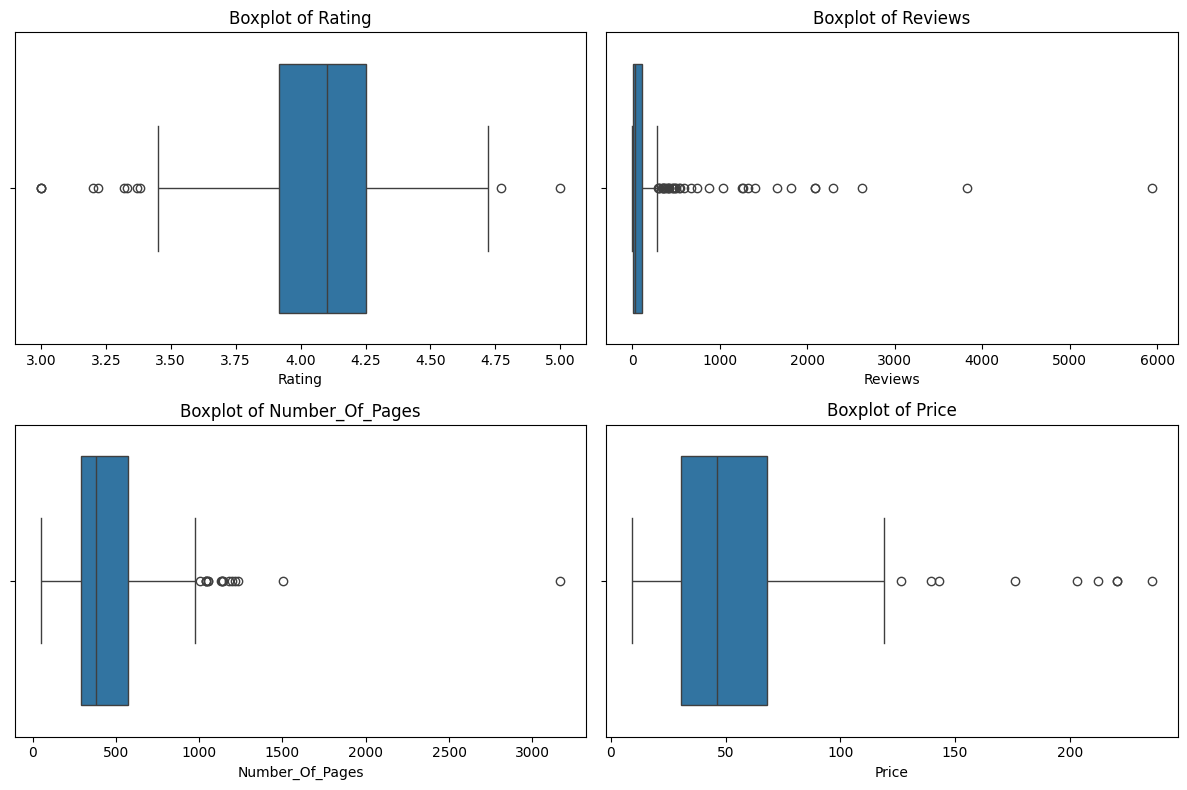

In [40]:
# Check and convert non-string values to string in 'Reviews' column
df['Reviews'] = df['Reviews'].astype(str).str.replace(',', '')

# Convert 'Reviews' column to numeric format
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Create box plots
plt.figure(figsize=(12, 8))

for i, feature in enumerate(['Rating', 'Reviews', 'Number_Of_Pages', 'Price'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])

    # Add title and labels
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

### Task 2 Multivariate outlier detection

In [41]:
data = df['Type'].unique()
label_encoder = LabelEncoder()

df['Type'] = label_encoder.fit_transform(df['Type'])
encoding_key = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoding Key:", encoding_key)

Encoding Key: {'Boxed Set - Hardcover': 0, 'Hardcover': 1, 'Kindle Edition': 2, 'Paperback': 3, 'Unknown Binding': 4, 'ebook': 5}
     Rating  Reviews                                         Book_title  \
0      4.17     3829                              The Elements of Style   
1      4.01     1406      The Information: A History, a Theory, a Flood   
2      3.33        0       Responsive Web Design Overview For Beginners   
3      3.97     1658  Ghost in the Wires: My Adventures as the World...   
4      4.06     1325                                   How Google Works   
..      ...      ...                                                ...   
266    3.76        0  3D Game Engine Architecture: Engineering Real-...   
267    3.94       22                An Introduction to Database Systems   
268    4.49       36  The Art of Computer Programming, Volumes 1-3 B...   
269    4.77        4  The Art of Computer Programming, Volumes 1-4a ...   
270    3.84        5              A Disciplin

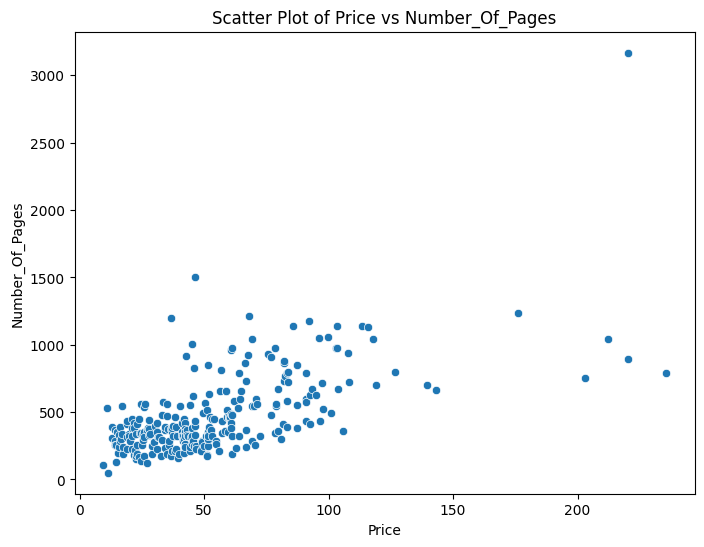

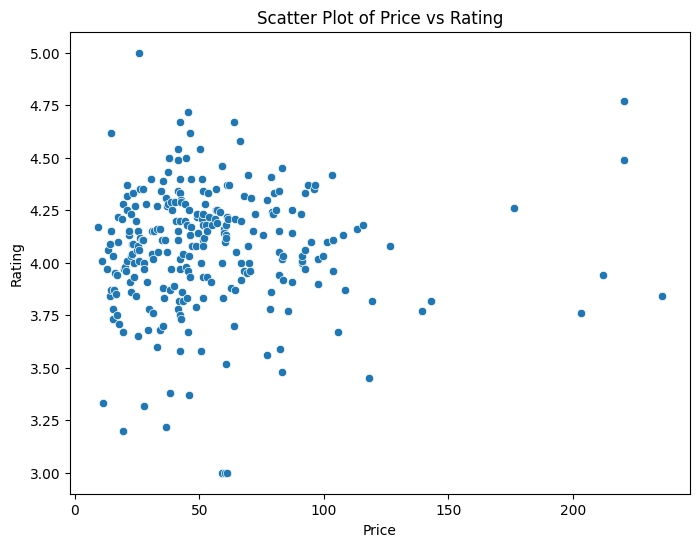

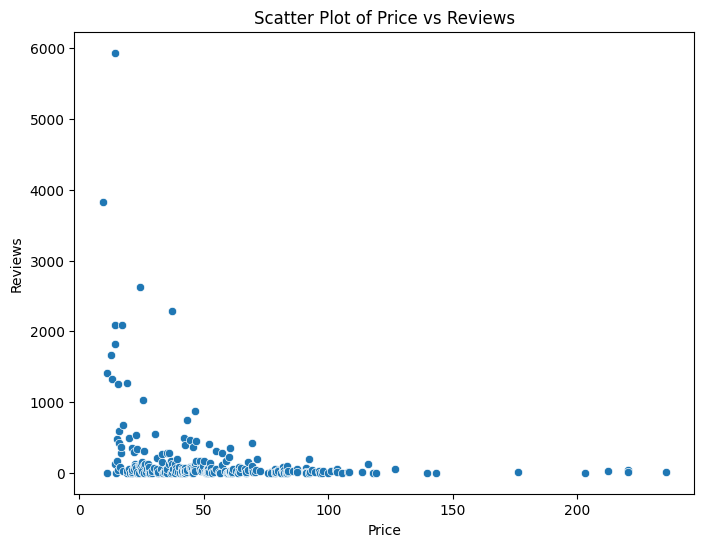

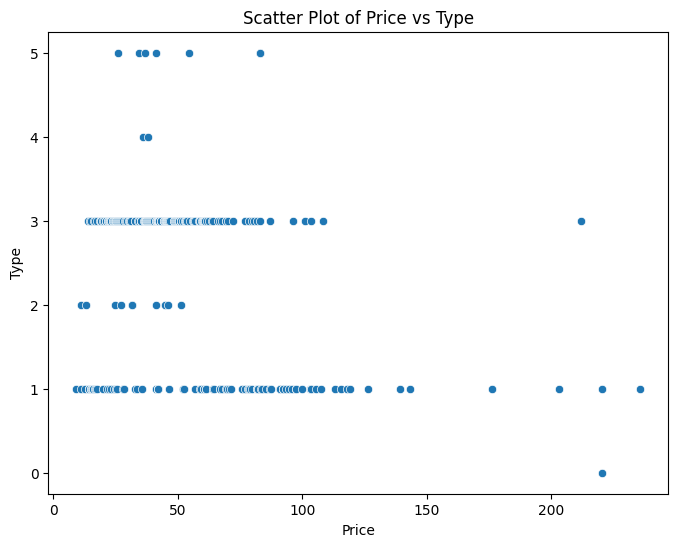

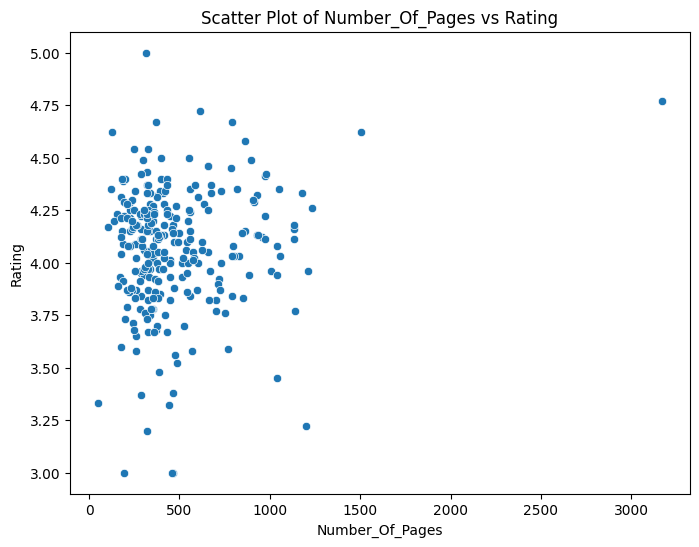

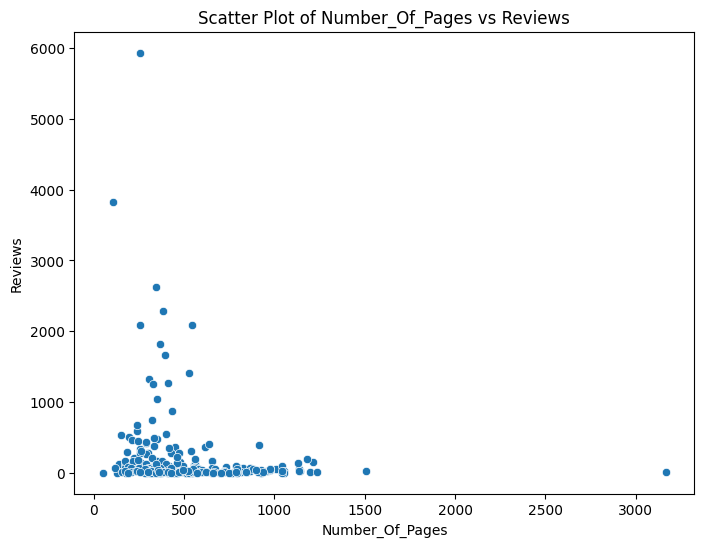

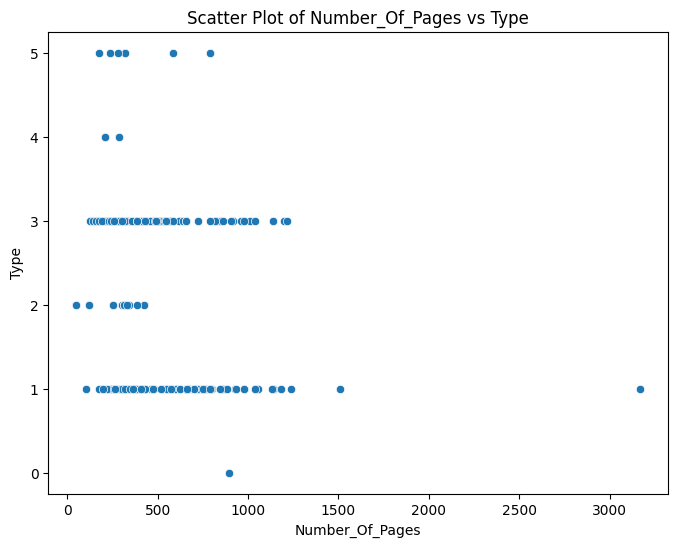

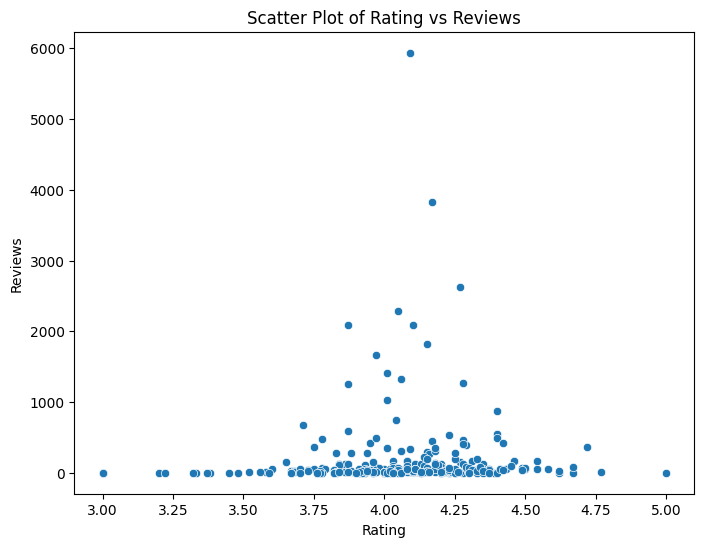

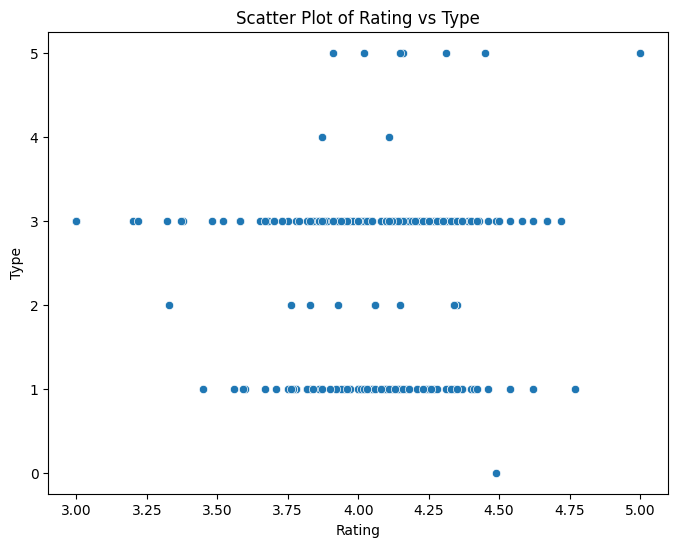

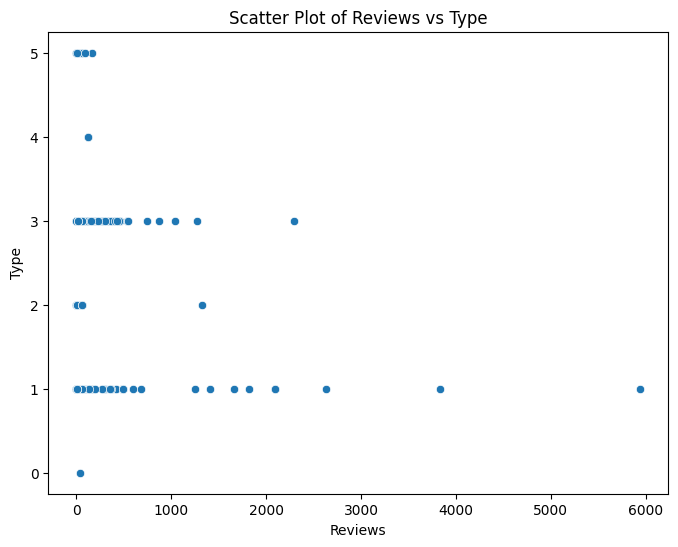

In [42]:
selected_features = ["Price", "Number_Of_Pages", "Rating", "Reviews", "Type"]

def plot_dbscan_bivariate(feature1, feature2):
    plt.figure(figsize=(8, 6))

    # Scatter plot
    sns.scatterplot(x=feature1, y=feature2, data=df)
    plt.title(f'Scatter Plot of {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)


    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(df[selected_features])

    outliers = df[clusters == -1]

    plt.show()

for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):
        feature1, feature2 = selected_features[i], selected_features[j]
        plot_dbscan_bivariate(feature1, feature2)


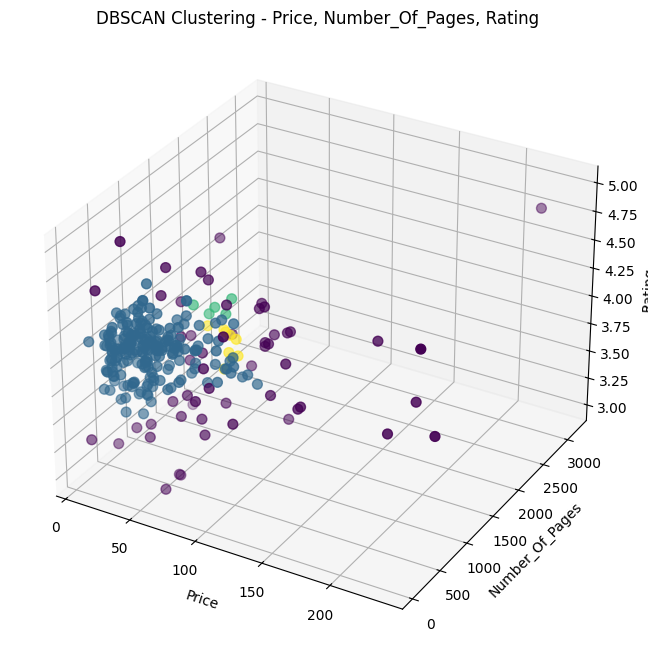

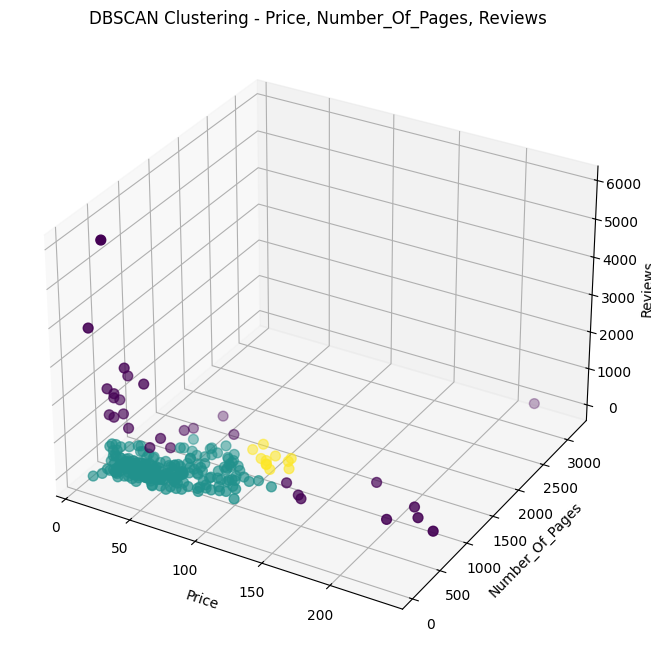

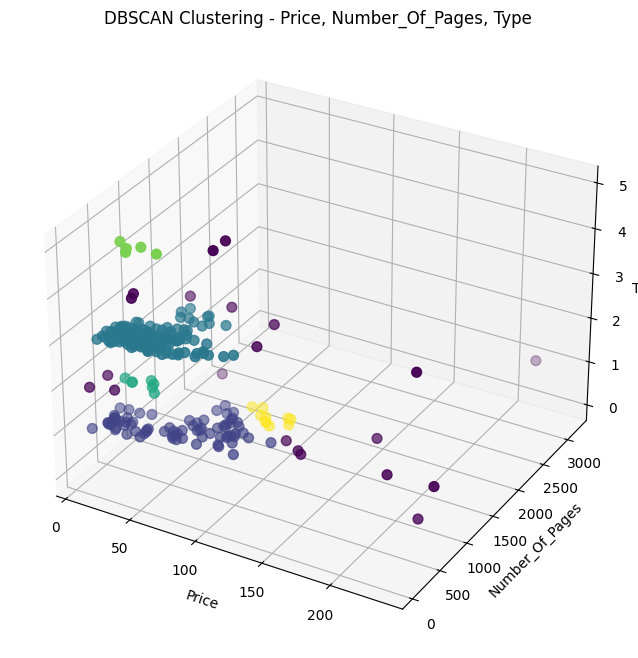

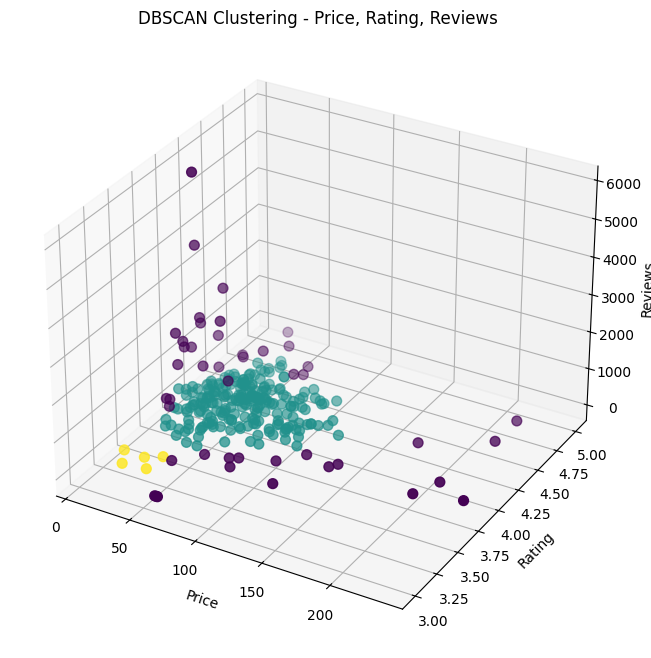

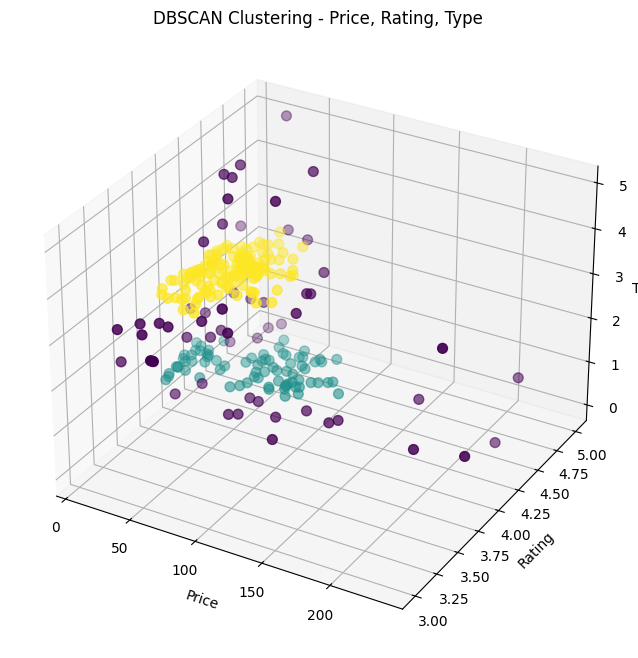

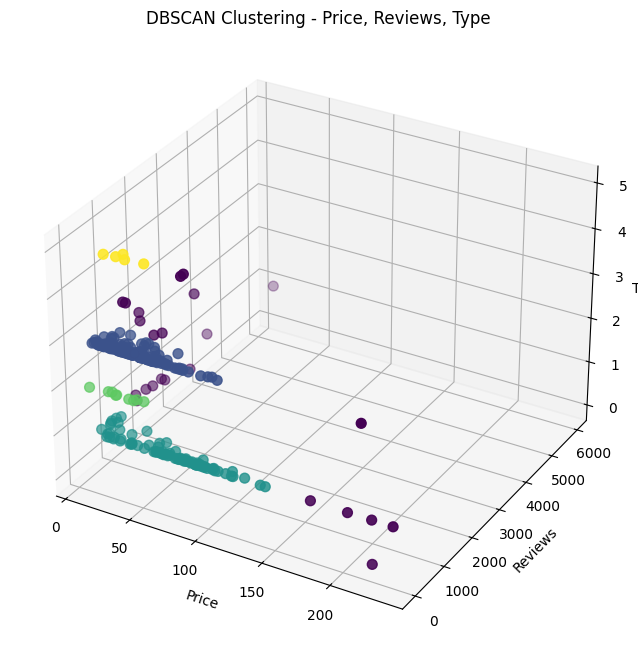

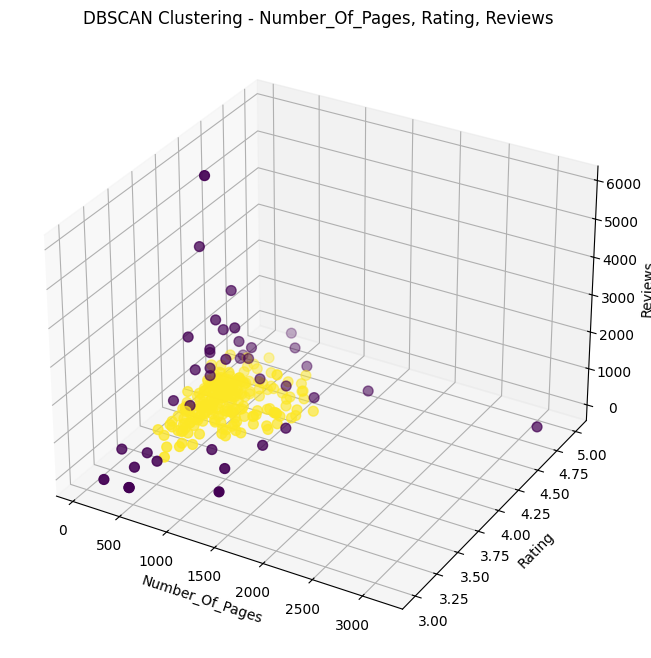

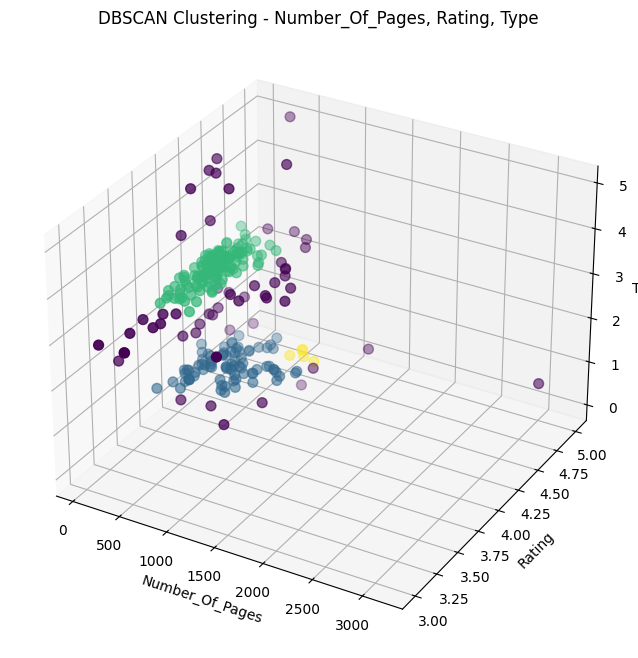

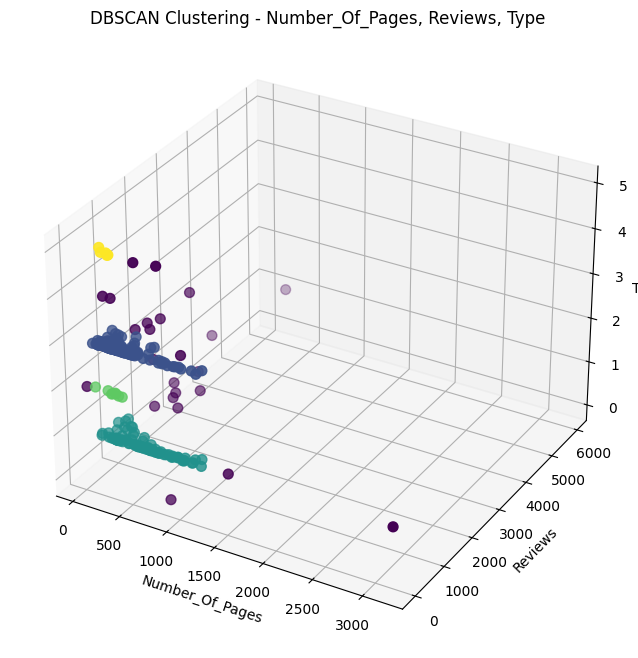

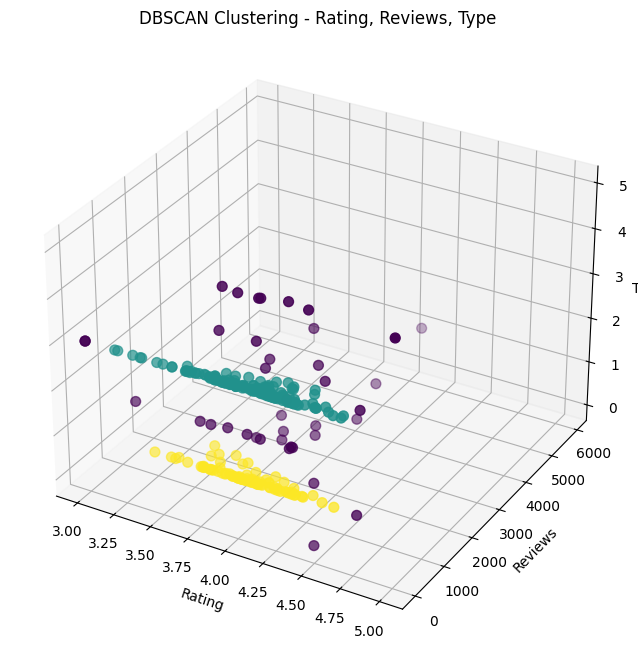

In [45]:
combinations = list(itertools.combinations(selected_features, 3))

def plot_dbscan_3d(feature1, feature2, feature3):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    data_for_dbscan = df[[feature1, feature2, feature3]]
    
    normalized_data = StandardScaler().fit_transform(data_for_dbscan)
    
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(normalized_data)

    ax.scatter(data_for_dbscan[feature1], data_for_dbscan[feature2], data_for_dbscan[feature3], c=labels, cmap='viridis', s=50)

    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
    ax.set_title(f"DBSCAN Clustering - {feature1}, {feature2}, {feature3}")

    plt.show()

for combination in combinations:
    plot_dbscan_3d(*combination)
